In [4]:
using Images
#https://juliaimages.org/latest/tutorials/quickstart/

In [61]:
filename = "CT-HS_yellow";

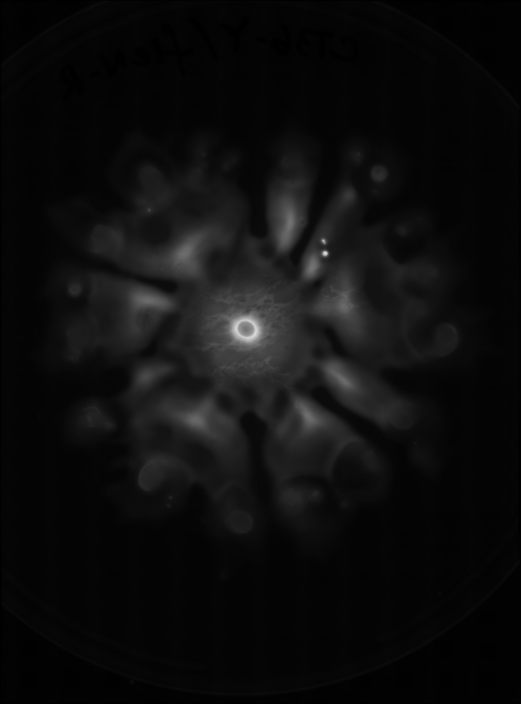

In [62]:
raw_img = load(string(filename, ".tif"));
img = Gray.(raw_img)

In [4]:
#choose a cutoff intensity visually
#from https://juliaimages.org/latest/examples/color_channels/rgb_hsv_thresholding/
# mask = zeros(size(img));
# cutoff = 0.05;
# for ind in eachindex(img)
#     if img[ind] > cutoff
#         mask[ind] = 1;
#     end
# end
# colorview(Gray, mask)

In [64]:
nrow = size(img)[1];
ncol = size(img)[2];
lside = minimum([nrow, ncol]); 
imcent1 = nrow ÷ 2;
imcent2 = ncol ÷ 2;
maxr = lside ÷ 2; #ignore anything further than this, ie far corners. 
cutoff = 0.05;
lside

8313

In [65]:
data_dict = Dict{Int, Vector{N0f8}}() #map radius to a (variable-length) vector of all the intensities. 
#for every pixel in the image
for ro in 1:nrow
    for co in 1:ncol
        #compute its radius (round to nearest 10 pixels because tif is high-def.)
        radius = Int(round(sqrt((ro - imcent1)^2 + (co - imcent2)^2), digits = -1));
        if radius > maxr
            continue #ignore corners outside petri dish
        end
        #compute its intensity for WT (red-ish in color, for simplicity assume equivalent to red channel)   
        pxl = img[ro, co];
        intensity = gray(pxl);
        if intensity < cutoff 
            continue #ignore off-of-branch pixels.
        end
        if !haskey(data_dict, radius)
            data_dict[radius] = N0f8[];
        end
        push!(data_dict[radius], intensity); 
    end
end

In [31]:
using Plots
#http://docs.juliaplots.org/latest/basics/

In [66]:
#get all averages by radius, for plotting
rdata = Any[]; intensedata = Any[];
for rad in sort(collect(keys(data_dict))) #sort!!
    push!(rdata, rad);
    avg_intensity = sum(data_dict[rad]) / length(data_dict[rad]); #could also use stats package
    push!(intensedata, avg_intensity);
end

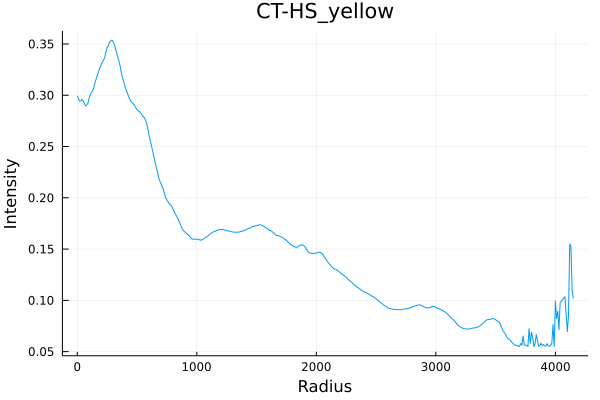

In [67]:
plot(rdata, intensedata)
plot!(title = filename, xlabel = "Radius", ylabel = "Intensity", leg = false)

In [68]:
#save results as csv
using DelimitedFiles
outname = string(filename, "_density_profile.csv")
open(outname, "w") do io
    writedlm(io, [rdata intensedata], ',')
end